In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random as rand

1. Randomly shuffle the dataset by taking a random seed of “42”. Create a training and testing set
partitions in the ratio of 70% : 30% by taking last 30% rows in the test set. The remaining rows will be
the training set. Make sure that the columns have the same datatypes. Display the mean values for each
columns and the number of samples belonging to each category (admitted and not-admitted)

In [8]:
rand.seed(42)
#giving the names to columns 
df=pd.read_csv('student_marks.csv')
# print(df.head(10))
df.columns=['Subject1','Subject2','Status']
# print(df.head(10))
print(df.describe())
print(df.info())
print(df.tail(10))

        Subject1   Subject2     Status
count  99.000000  99.000000  99.000000
mean   65.957614  66.102779   0.606061
std    19.302009  18.638875   0.491108
min    30.058822  30.603263   0.000000
25%    51.297736  47.978125   0.000000
50%    67.319257  66.589353   1.000000
75%    80.234877  79.876423   1.000000
max    99.827858  98.869436   1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Subject1  99 non-null     float64
 1   Subject2  99 non-null     float64
 2   Status    99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB
None
     Subject1   Subject2  Status
89  94.094331  77.159105       1
90  90.448551  87.508792       1
91  55.482161  35.570703       0
92  74.492692  84.845137       1
93  89.845807  45.358284       1
94  83.489163  48.380286       1
95  42.261701  87.103851       1
96  99.315009  68.775409       1


In [23]:

#converting the columns into int 
df['Subject1']=df['Subject1'].astype(int)
df['Subject2']=df['Subject2'].astype(int)
df['Status']=df['Status'].astype(int)

In [25]:
#mean of the columns
print(df['Subject1'].mean())
print(df['Subject2'].mean())
# print(df['Status'].mean())

65.51515151515152
65.54545454545455


In [ ]:
print(df.shape)
#there are 99 rows 
#shuffling the datafra,e
np.random.seed(42)
np.random.shuffle(df.values)
# print(df.head(10))
test_set_size=int(0.3*df.shape[0])
train_set_size=df.shape[0]-test_set_size
print(test_set_size)
print(train_set_size)
train_Set=df.head(train_set_size)
test_Set=df.tail(test_set_size)
# print("train set",train_Set.head(10))
# print("test set",test_Set.head(10))
print("size of test set",test_Set.shape)
print("size of train set",train_Set.shape)



(99, 3)
29
70
size of test set (29, 3)
size of train set (70, 3)


. Create a scatter plot using the training set and mark the points differently for different classes.

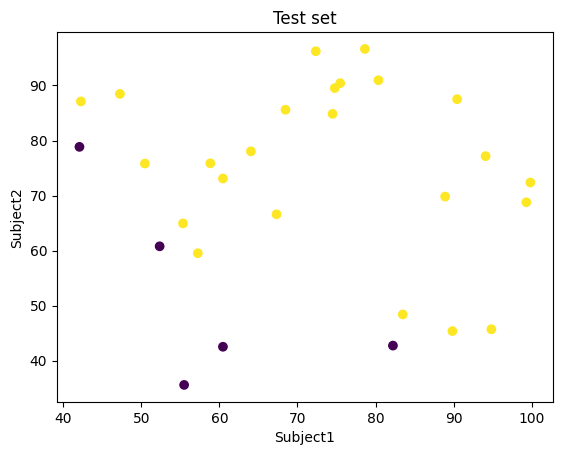

In [26]:
#scatter plot of test size

plt.scatter(test_Set['Subject1'],test_Set['Subject2'],c=test_Set['Status'])
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('Test set')
plt.show()


In [27]:
from scipy.optimize import fmin_tnc

3. Plot the decision boundary on the previously drawn scatter plot.

In [37]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import fmin_tnc

# class MyLogisticRegression:
#     def __init__(self, learn_rate=0.001, epochs=1000):
#         self.learn_rate = learn_rate
#         self.epochs = epochs

#     def sigmoid(self, x, weights, bias):
#         return 1 / (1 + np.exp(-(np.dot(x, weights) + bias)))

#     def cost_fn(self, params, x, y):
#         weights = params[:-1]
#         bias = params[-1]
#         h = self.sigmoid(x, weights, bias)
#         m = x.shape[0]
#         cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
#         return cost

#     def gradient_fn(self, params, x, y):
#         weights = params[:-1]
#         bias = params[-1]
#         h = self.sigmoid(x, weights, bias)
#         m = x.shape[0]
#         dw = (1/m) * np.dot(x.T, (h - y))
#         db = (1/m) * np.sum(h - y)
#         grad = np.append(dw, db)
#         return grad

#     def fit(self, x, y):
#         m, n = x.shape
#         initial_params = np.zeros(n + 1)
#         x_with_bias = np.hstack([x, np.ones((m, 1))])
#         result = fmin_tnc(func=self.cost_fn, x0=initial_params, fprime=self.gradient_fn, args=(x_with_bias, y))
#         optimal_params = result[0]
#         self.weights = optimal_params[:-1]
#         self.bias = optimal_params[-1]

#     def predict(self, x):
#         m = x.shape[0]
#         x_with_bias = np.hstack([x, np.ones((m, 1))])
#         predictions = self.sigmoid(x_with_bias, self.weights, self.bias)
#         return (predictions >= 0.5).astype(int)


In [39]:


class MyLogisticRegression:
    def __init__(self,learn_rate=0.001,epochs=1000):
        self.learn_rate =learn_rate
        self.epochs =epochs

    def sigmoid(self,x,weights,bias):
        return 1 / (1 + np.exp(-(np.dot(x,weights) + bias)))

    def cost_fn(self,params,x,y):
        weights =params[:-1]
        bias =params[-1]
        h =self.sigmoid(x,weights,bias)
        m =x.shape[0]
        cost =(-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        return cost

    def gradient_fn(self,params,x,y):
        weights =params[:-1]
        bias =params[-1]
        h =self.sigmoid(x,weights,bias)
        m =x.shape[0]
        dw =(1/m)*np.dot(x.T,(h-y))
        db =(1/m)*np.sum(h-y)
        grad =np.append(dw,db)
        return grad

    def fit(self,x,y):
        m,n =x.shape
        initial_params =np.zeros(n + 1)
        x_with_bias =np.hstack([x,np.ones((m,1))])
        result =fmin_tnc(func=self.cost_fn,x0=initial_params,fprime=self.gradient_fn,args=(x_with_bias,y))
        optimal_params =result[0]
        self.weights =optimal_params[:-1]
        self.bias =optimal_params[-1]

    def predict(self,x):
        m =x.shape[0]
        x_with_bias =np.hstack([x,np.ones((m,1))])
        predictions =self.sigmoid(x_with_bias,self.weights,self.bias)
        return (predictions >=0.5).astype(int)


In [ ]:
mport numpy as np
from scipy.optimize import fmin_tnc
class MyLogisticRegression:
    def _init_(self):
        self.theta=None

    def sigmoid(self,z):
        sig= 1/(1+np.exp(-z))
        return sig
    
    def hypothesis_func(self,theta,x):
        h_x=self.sigmoid(np.dot(x,theta))
        return h_x
    
    def cost_func(self,theta,x,y):
        m=y.size
        cf= (-1/m)*np.sum(y*np.log(self.hypothesis_func(theta,x))+(1-y)*np.log(1-self.hypothesis_func(theta,x)))
        return cf
    
    def gradient(self,theta,x,y):
        m=x.shape[0]
        grad= (1/m) * np.dot(x.T,self.hypothesis_func(theta,x)-y)
        return grad
    
    def fit(self,x,y):
        init_theta=np.zeros(x.shape[1])
        res=fmin_tnc(func=self.cost_func,x0=init_theta,fprime=self.gradient,args=(x,y))
        
        self.theta=res[0]
        return self.theta
    
    def pred(self,x):
        y_hypo_func=self.hypothesis_func(self.theta,x)
        return np.where(y_hypo_func >= 0.5,1,0)
    
np.random.seed(42)
m = 100  
x = np.random.randn(m, 2)  
y = (x[:, 0] + x[:, 1] > 0).astype(int)  

x = np.hstack((np.ones((m, 1)), x))  

log_clf= MyLogisticRegression()
theta_opt = log_clf.fit(x, y)
print("Optimized Theta:", theta_opt)

cost=log_clf.cost_func(theta_opt,x,y)
print("cost :",cost)

5. Create more columns in the dataframes (training and test) corresponding to higher order terms x 12,
x22, and x1x2 .

In [36]:
#createin new columns
df['Subject1^2']=df['Subject1']**2
df['Subject2^2']=df['Subject2']**2
df['Subject1*Subject2']=df['Subject1']*df['Subject2']
print(df.head(10))
print(df.describe())
print(df.info())
print(df.tail(10))

   Subject1  Subject2  Status  Subject1^2  Subject2^2  Subject1*Subject2
0        30        43       0         900        1849               1290
1        35        72       0        1225        5184               2520
2        60        86       1        3600        7396               5160
3        79        75       1        6241        5625               5925
4        45        56       0        2025        3136               2520
5        61        96       1        3721        9216               5856
6        75        46       1        5625        2116               3450
7        76        87       1        5776        7569               6612
8        84        43       1        7056        1849               3612
9        95        38       0        9025        1444               3610
        Subject1   Subject2     Status   Subject1^2   Subject2^2  \
count  99.000000  99.000000  99.000000    99.000000    99.000000   
mean   65.515152  65.545455   0.606061  4659.353535  4639.868